In [1]:
import numpy as np
import pandas as pd
import shap
import joblib

# Load Model & Artifacts
rf_fraud_model = joblib.load('../models/rf_fraud_model.pkl')
Xf_test = pd.read_parquet('../data/processed/Xf_test.parquet')
feature_names_fraud = np.load('../models/feature_names_fraud.npy', allow_pickle=True)

# Convert Test Set to DataFrame with Feature Names
Xf_test_df = pd.DataFrame(Xf_test, columns=feature_names_fraud)

# Remove Constant or All-NaN Columns
Xf_test_df = Xf_test_df.loc[:, (Xf_test_df.nunique() > 1) & (~Xf_test_df.isna().all())]

# SHAP Explainer
explainer_fraud = shap.TreeExplainer(rf_fraud_model)
shap_values_fraud = explainer_fraud(Xf_test_df)

# Global Importance Plot
shap.plots.beeswarm(shap_values_fraud[..., 1], max_display=15)


: 

In [2]:
nan_cols = Xf_test_df.columns[Xf_test_df.isna().all()]
constant_cols = Xf_test_df.columns[Xf_test_df.nunique() <= 1]

print(f"All-NaN columns: {nan_cols.tolist()}")
print(f"Constant columns: {constant_cols.tolist()}")


All-NaN columns: ['num__purchase_value', 'num__age', 'num__time_since_signup', 'num__user_transaction_count', 'num__device_transaction_count', 'num__time_to_purchase', 'num__high_value_transaction', 'cat__source_Ads', 'cat__source_Direct', 'cat__source_SEO', 'cat__browser_Chrome', 'cat__browser_FireFox', 'cat__browser_IE', 'cat__browser_Opera', 'cat__browser_Safari', 'cat__sex_F', 'cat__sex_M', 'cat__country_Afghanistan', 'cat__country_Albania', 'cat__country_Algeria', 'cat__country_Angola', 'cat__country_Antigua and Barbuda', 'cat__country_Argentina', 'cat__country_Armenia', 'cat__country_Australia', 'cat__country_Austria', 'cat__country_Azerbaijan', 'cat__country_Bahamas', 'cat__country_Bahrain', 'cat__country_Bangladesh', 'cat__country_Barbados', 'cat__country_Belarus', 'cat__country_Belgium', 'cat__country_Belize', 'cat__country_Benin', 'cat__country_Bermuda', 'cat__country_Bhutan', 'cat__country_Bolivia', 'cat__country_Bonaire; Sint Eustatius; Saba', 'cat__country_Bosnia and Herze

In [2]:
# Local Explanation (Waterfall for first instance)
shap.plots.waterfall(shap_values_fraud[0, 1])

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
import numpy as np
import pandas as pd
import shap
import joblib

# Load Model & Artifacts
rf_creditcard_model = joblib.load('../models/rf_creditcard_model.pkl')
Xcc_test = pd.read_parquet('../data/processed/Xc_test.parquet')
feature_names_cc = np.load('../models/feature_names_creditcard.npy', allow_pickle=True)

# Convert Test Set to DataFrame with Feature Names
Xcc_test_df = pd.DataFrame(Xcc_test, columns=feature_names_cc)

# Remove Constant or All-NaN Columns
Xcc_test_df = Xcc_test_df.loc[:, (Xcc_test_df.nunique() > 1) & (~Xcc_test_df.isna().all())]

# SHAP Explainer
explainer_cc = shap.TreeExplainer(rf_creditcard_model)
shap_values_cc = explainer_cc(Xcc_test_df)

# Global Importance Plot
shap.plots.beeswarm(shap_values_cc[..., 1], max_display=15)


In [6]:
# Local Explanation (Waterfall for first instance)
shap.plots.waterfall(shap_values_cc[0, 1])

TypeError: only length-1 arrays can be converted to Python scalars

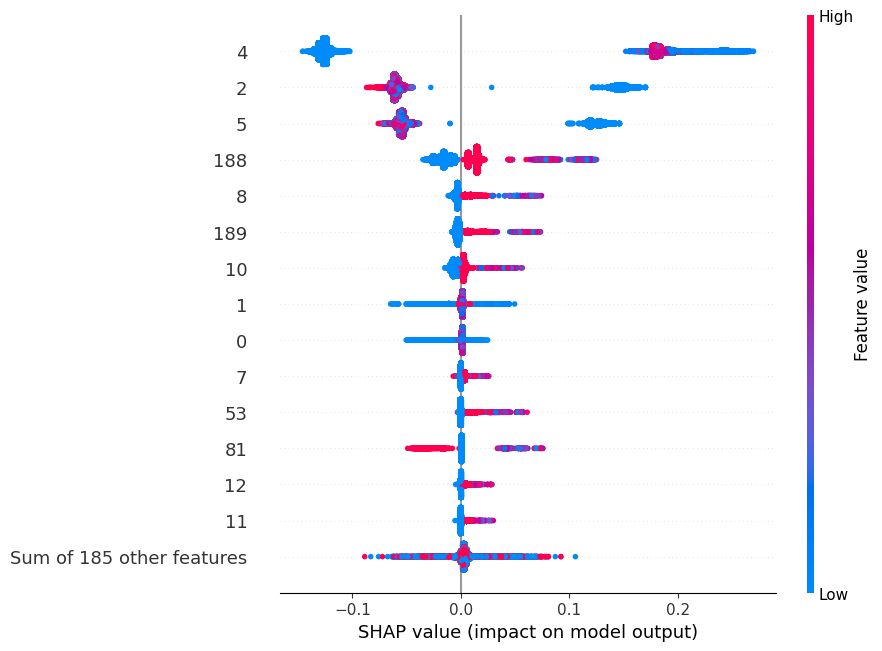